In [1]:
import sys
sys.path.append('/Users/daiyiluo/Documents/ELEC599')
import CalHMM
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn.hmm
import imp

In [120]:
imp.reload(CalHMM)

<module 'CalHMM' from '/Users/daiyiluo/Documents/ELEC599/CalHMM.py'>

## a. Load data

In [2]:
folder = '/Users/daiyiluo/Downloads/KQ095_210205' #KQ086_210110' #
timebin = 500

In [3]:
data = np.load(f'{folder}/timebin_{timebin}.npz') 
Trace = data['Trace']
Distance = data['Distance']
lap_end = data['lap_end']
idx = data['idx']
del data

lk = np.load(f'{folder}/S.npz')['lk']

Trace.shape, Distance.shape, idx.shape, lk.shape

((1821, 219), (1821,), (1821,), (96593,))

### Exclude data points or exclude cells

In [ ]:
# Save original copy

# Trace0 = Trace.copy()
# Distance0 = Distance.copy()
# lap_end0 = lap_end.copy()

In [ ]:
#--------- Segment the traces ---------#

# st = 0
# end = 831
# Trace=Trace0[st:end,:]
# Distance=Distance0[st:end]
# lap_end=lap_end0[np.where((lap_end0>st)&(lap_end0<end))]-st
# print(f'Trace shape: {Trace.shape}, Distance shape: {Distance.shape}')

In [ ]:
#--------- Exclude some cells ---------#

# 1. Delete one specific cell
# l=np.arange(Trace.shape[1])
# l=np.delete(l,177)

# 2. Randomly select 110 cells
# l = np.random.choice(Trace.shape[1], size=110,replace=False)

# Trace=Trace[:,l]
# Trace.shape

## b. Run Gaussian HMM
### Original data

In [4]:
origin = hmmlearn.hmm.GaussianHMM(n_components=20) 
origin.fit(Trace)

x1, plst1, occ1, posterior_states1, pos_COM1 = CalHMM.comp_poststates_pos(origin, Trace, Distance)
err_rate1, dev1, Decoded_position1 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states1, pos_COM1)

print(f'Error Rate: {err_rate1}')

Error Rate: 0.1641696908101365


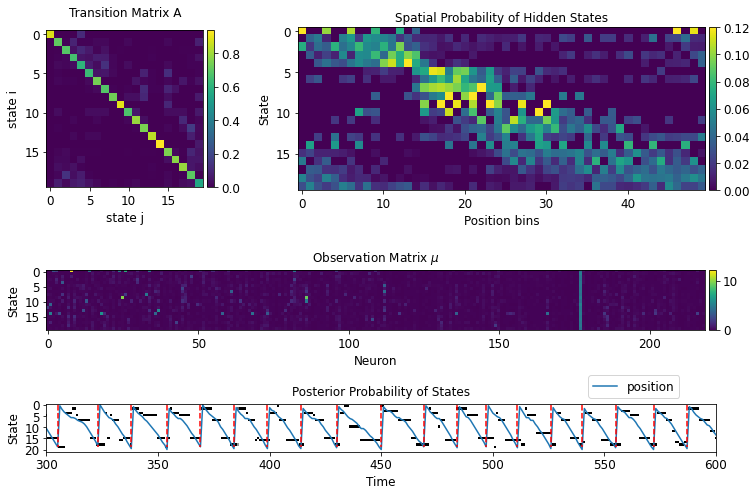

In [6]:
_, plst1, _, _, _, _ = CalHMM.show_all_plots(origin, Trace, Distance, lap_end, t_st=300, t_duration=300,vmax=.12)

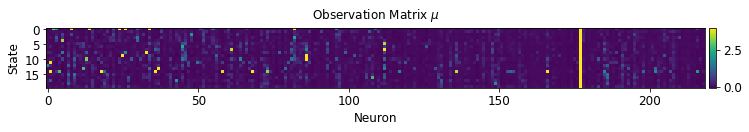

In [9]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
f, ax = plt.subplots(figsize=(12,3))
im = ax.matshow(origin.means_[plst1,:],vmax=4)
ax.set_xlabel('Neuron')
ax.set_ylabel('State')
ax.set_title(r'Observation Matrix $\mu$')
ax.xaxis.set_ticks_position('bottom')
divider = make_axes_locatable(ax)
f.colorbar(im, cax=divider.append_axes("right", size=0.1,pad=0.05))

### Time Shuffle

In [124]:
ts_Trace = CalHMM.get_time_shuffle(Trace)
ts = hmmlearn.hmm.GaussianHMM(n_components=20) 
ts.fit(ts_Trace)

x2, plst2, occ2, posterior_states2, pos_COM2 = CalHMM.comp_poststates_pos(ts, Trace, Distance)
err_rate2, dev2, Decoded_position2 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states2, pos_COM2)

print(f'Error Rate: {err_rate2}')

Error Rate: 0.1732450094304045


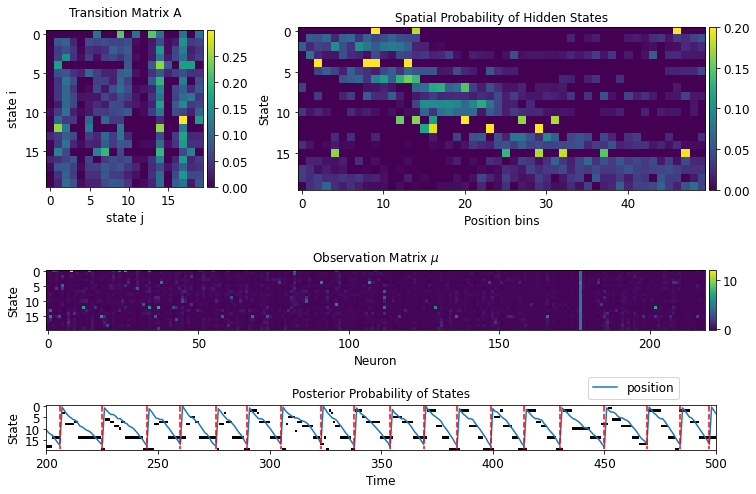

In [126]:
_, _, _, _, _, _ = CalHMM.show_all_plots(ts, Trace, Distance, lap_end, t_st=200, t_duration=300,vmax=.2)

### Transient Shuffle

In [127]:
trsn_Trace = CalHMM.get_trsn_shuffle(Trace)
trsn = hmmlearn.hmm.GaussianHMM(n_components=20) 
trsn.fit(trsn_Trace)

x3, plst3, occ3, posterior_states3, pos_COM3 = CalHMM.comp_poststates_pos(trsn, Trace, Distance)
err_rate3, dev3, Decoded_position3 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states3, pos_COM3)

print(f'Error Rate: {err_rate3}')

Error Rate: 0.2507753558909428


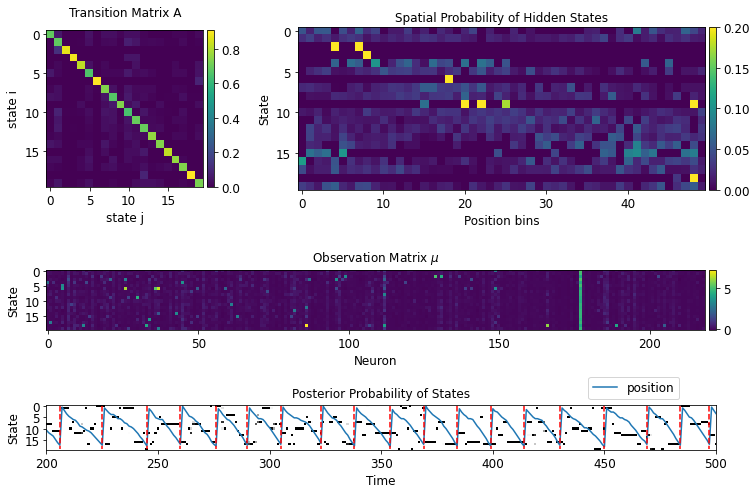

In [128]:
_, _, _, _, _, _ = CalHMM.show_all_plots(trsn, Trace, Distance, lap_end, t_st=200, t_duration=300,vmax=.2)

## c. Save and Reolad

In [ ]:
save = False
if save==True:
    CalHMM.save_object(origin, f'{folder}/timebin_{timebin}_origin.pkl')
    CalHMM.save_object(ts, f'{folder}/timebin_{timebin}_ts.pkl')
    CalHMM.save_object(trsn, f'{folder}/timebin_{timebin}_trsn.pkl')

In [ ]:
origin = CalHMM.load_object(f'{folder}/timebin_{timebin}_origin.pkl')
ts = CalHMM.load_object(f'{folder}/timebin_{timebin}_ts.pkl')
trsn = CalHMM.load_object(f'{folder}/timebin_{timebin}_trsn.pkl')